In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

import os.path as op

In [33]:
csvs = glob.glob("/mnt/stepanauskas_nfs/projects/sag_mag/coverm/manual_recruit2/*recruit_count*ol-0.csv")


In [34]:
csvs

['/mnt/stepanauskas_nfs/projects/sag_mag/coverm/manual_recruit2/merge_sags_vs_ERR599173_recruit_count_by_pid_range_ml-0_ol-0.csv',
 '/mnt/stepanauskas_nfs/projects/sag_mag/coverm/manual_recruit2/merge_mags_vs_ERR598994_recruit_count_by_pid_range_ml-0_ol-0.csv',
 '/mnt/stepanauskas_nfs/projects/sag_mag/coverm/manual_recruit2/merge_mags_vs_ERR599010_recruit_count_by_pid_range_ml-0_ol-0.csv',
 '/mnt/stepanauskas_nfs/projects/sag_mag/coverm/manual_recruit2/merge_mags_vs_ERR598984_recruit_count_by_pid_range_ml-0_ol-0.csv',
 '/mnt/stepanauskas_nfs/projects/sag_mag/coverm/manual_recruit2/merge_mags_vs_ERR599052_recruit_count_by_pid_range_ml-0_ol-0.csv',
 '/mnt/stepanauskas_nfs/projects/sag_mag/coverm/manual_recruit2/merge_mags_vs_ERR598992_recruit_count_by_pid_range_ml-0_ol-0.csv',
 '/mnt/stepanauskas_nfs/projects/sag_mag/coverm/manual_recruit2/merge_mags_vs_ERR599160_recruit_count_by_pid_range_ml-0_ol-0.csv',
 '/mnt/stepanauskas_nfs/projects/sag_mag/coverm/manual_recruit2/merge_mags_vs_ERR59

In [74]:

dfs = []

for csv in csvs:
    df = pd.read_csv(csv)
    df['library'] = op.basename(csv).split("_vs_")[1].split("_")[0]
    df['type'] = op.basename(csv).split("_vs_")[0].split("_")[1]
    dfs.append(df)
    
bdf = pd.concat(dfs)

bdf.loc[bdf['type'] == 'sags','type'] = 'SAG'
bdf.loc[bdf['type'] == 'mags','type'] = 'MAG'

In [75]:
div_dict = {'paired': 1000000,
            'unpaired': 2000000}


In [84]:
pct_reads = []

for i, l in bdf.iterrows():
    pct_reads.append(l['recruited_read_count'] / div_dict[l['paired_unpaired']] * 100)

    
bdf['pct_reads_recruited'] = pct_reads

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

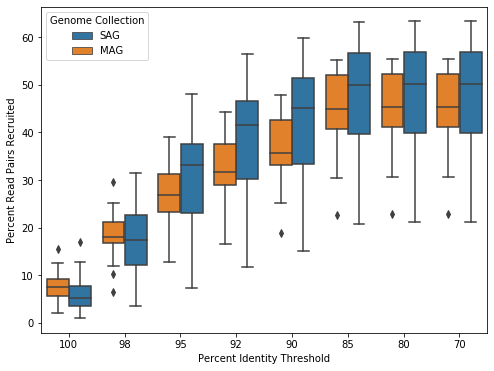

In [86]:
fig, ax = plt.subplots(figsize = (8, 6))

sns.boxplot(x = 'pid', y = 'pct_reads_recruited', data = bdf[bdf['paired_unpaired'] == 'paired'], hue = 'type', ax = ax)
ax.invert_xaxis()

ax.set_ylabel('Percent Read Pairs Recruited')
ax.set_xlabel('Percent Identity Threshold')

ax.legend(title = 'Genome Collection')

plt.savefig("/mnt/stepanauskas_nfs/projects/sag_mag/combined_recruitment_ml0_ol0.png")
plt.savefig("combined_recruitment_ml0_ol0.png")

In [87]:
bdf.to_csv("/mnt/stepanauskas_nfs/projects/sag_mag/combined_bwa_recruitment_totals_ml0_ol0.csv", index = False)